In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
import scipy.stats as stats
import math
direc = 'C:/Users/svo/Google Drive/Bas Games/'
fig_direc = 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/'
from matplotlib import rc,rcParams
rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
rcParams['font.family'] = "sans-serif"


In [14]:
S = np.loadtxt(direc + 'Analysis/Summary Stats/summary_stats_hvh_final.txt')

In [15]:
name = ['dist_to_center','dist_to_self','dist_to_opp','dist_to_cm_self','dist_to_cm_opp',
        'neighbours_self','neighbours_opp','threats_made','threats_defended',
        'threats_executed']

stat_names = ['Distance to board center','Average distance to own pieces',
              'Average distance to\nopponent\'s pieces',
              'Distance to center-of-mass\n of own pieces',
              'Distance to center-of-mass\n of opponent\'s pieces',
              'Number of own pieces on\n neighbouring squares',
              'Number of opponent\'s pieces on\n neighbouring squares',
              'Number of threats\nmade','Number of threats defended',
              'Number of threats executed']

letters=['A','B','C','D','E','F','G','H','I','J']

ireal = [15,3,6,9,12,18,21,24,27,30]
imod = [16,4,7,10,13,19,22,25,28,31]
ichance = [17,5,8,11,14,20,23,26,29,32]

In [16]:
def summ_hist(i,j):
    return np.bincount(S[:,i].astype(int),weights = S[:,j])/np.bincount(S[:,i].astype(int))

rho1 = [stats.spearmanr(summ_hist(0,ireal[i])-summ_hist(0,ichance[i]),
                 summ_hist(0,imod[i])-summ_hist(0,ichance[i])).correlation for i in range(len(name))]

rho2 = [stats.spearmanr(summ_hist(0,ireal[i]),
                 summ_hist(0,imod[i]))[0] for i in range(len(name))]

rho3 = [stats.spearmanr(summ_hist(0,ireal[i]),
                 summ_hist(0,ichance[i]))[0] for i in range(len(name))]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/summary_npieces_A.pdf'

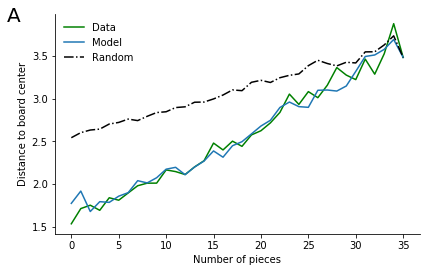

In [17]:
for i,letter in enumerate(letters):
    fig, ax = plt.subplots()
    ax.set_xlabel('Number of pieces')    
    ax.plot(summ_hist(1,ireal[i]),'-g',label='Data')
    ax.plot(summ_hist(1,imod[i]),'-',color='C0',label='Model')
    ax.plot(summ_hist(1,ichance[i]),'-.k',label='Random')
    ax.set_ylabel(stat_names[i])
    ax.text(0.02, 0.9, letter, horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.tight_layout()
    plt.legend(frameon=False)
    fig.savefig(fig_direc + 'summary_npieces_' + letter + '.pdf')
    plt.show()    


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/summary_sub_A.pdf'

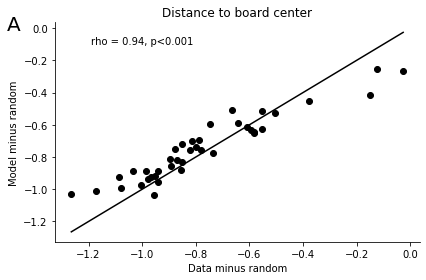

In [18]:
def report_significance(p):
    if p<0.001:
        return "p<0.001"
    elif p<0.01:
        return "p<0.01"
    elif p<0.05:
        return "p<0.05"
    else:
        return "p=" + "%.2f" % p
    

for i,letter in enumerate(letters):
    fig, ax = plt.subplots()
    ax.set_xlabel('Data minus random')
    ax.set_ylabel('Model minus random')
    ax.set_title(stat_names[i])
    x=summ_hist(0,ireal[i])-summ_hist(0,ichance[i])
    y=summ_hist(0,imod[i])-summ_hist(0,ichance[i])
    ax.plot(x,y,'ok')
    equality = [min(np.hstack([x,y])),max(np.hstack([x,y]))]
    ax.plot(equality,equality,'-k')
    ax.text(0.02, 0.9, letter, horizontalalignment='left',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rho,p = stats.spearmanr(x,y)
    ax.text(0.1,0.9,'rho = ' + "%.2f" % rho + ", " + report_significance(p),transform=ax.transAxes)
    fig.tight_layout()
    fig.savefig(fig_direc + 'summary_sub_' + letter + '.pdf')
    plt.show()

In [19]:
rho1 = [stats.spearmanr(summ_hist(0,ireal[i])-summ_hist(0,ichance[i]),
                 summ_hist(0,imod[i])-summ_hist(0,ichance[i])).correlation for i in range(len(name))]

rho2 = [stats.spearmanr(summ_hist(0,ireal[i]),
                 summ_hist(0,imod[i]))[0] for i in range(len(name))]

rho3 = [stats.spearmanr(summ_hist(0,ireal[i]),
                 summ_hist(0,ichance[i]))[0] for i in range(len(name))]


In [20]:
max(rho1)

0.9422138836772985

In [21]:
ind=np.nonzero(np.logical_and.reduce([S[:-1,34]>=2,S[1:,33]>=1]))[0]
print(len(ind)/10)
x = 100*(S[ind+1,30]>0)
y = 100*(S[ind+1,31]>0)

print(np.mean(x),np.std(x)/np.sqrt(np.prod(x.shape)))
print(np.mean(y),np.std(y)/np.sqrt(np.prod(y.shape)))

180.0
89.44444444444444 0.7242374543343024
87.5 0.7795119555779045


In [22]:
x=100*np.array([np.nonzero(S[i:,1]==0)[0][0]%2==0 for i in ind[:180]])
print(np.mean(x),np.std(x)/np.sqrt(np.prod(x.shape)))

96.11111111111111 1.4409977872192998


In [23]:
ind[-1]

54818

In [24]:
0.961*180

172.98

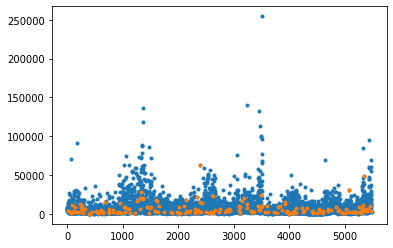

In [25]:
RT=np.loadtxt(direc + 'Analysis/Move Statistics/move_stats_hvh.txt')[:,-1]
plt.plot(RT,'.')
plt.plot(ind[:180],RT[ind[:180]],'.')
plt.show()